In [1]:
import numpy as np
import pandas as pd
import find_split as fs
import evaluation as ev
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('clean_dataset.txt')
print(data[:5])

[[-64. -56. -61. -66. -71. -82. -81.   1.]
 [-68. -57. -61. -65. -71. -85. -85.   1.]
 [-63. -60. -60. -67. -76. -85. -84.   1.]
 [-61. -60. -68. -62. -77. -90. -80.   1.]
 [-63. -65. -60. -63. -77. -81. -87.   1.]]


In [3]:
#first method: following the algo given in the coursework instructions

def DECISION_TREE_LEARNING(data,depth=0):
    '''
    Recursive tree algorithm, simply run the function on the data
    It will return tree, depth as described in the coursework instructions 
    '''
    #if all samples have the same label
    if len(np.unique(data.values[:,-1]))==1:

        #return a leaf node
        node=tree_node(label=data.values[0,-1],depth=depth+1)
        return node,depth+1

    else:

        #find split
        #split attribute: router from [1,...,6]
        #split_value: router value        
        split_attribute,split_value,temp_data=find_split(data)
        l_data=temp_data[0]
        r_data=temp_data[1]
        
        #recursively callthe function
        l_branch,l_depth=DECISION_TREE_LEARNING(l_data,depth+1)
        r_branch,r_depth=DECISION_TREE_LEARNING(r_data,depth+1)
        
        #here we create a non-leaf node, it has split value and attribute as well as 2 children
        node=tree_node(split_value=split_value,split_attribute=split_attribute,left=l_branch,right=r_branch,depth=depth+1)
        return node,max(l_depth,r_depth)

    def get_depth(self):
            max_depth=[self.depth]
            if self.left_child():
                max_depth.append(self.left_child.get_depth())
            if self.right_child():
                max_depth.append(self.right_child.get_depth())                 
            return max(max_depth)
                 
    def predict(self,data):
        vals=[]
        for i in range(len(data)):
            #runs through the code and returns result of each point
            if self.label:
                vals.append(self.label)
            else:
                if data_attribute > self.split_value:
                     #subset data based on the split value and attribute
                     vals.append(self.right_child.test(data_new))
                else:
                     vals.append(self.left_child.test(data_new))
        return vals
            
    def visualise(self):
        #visualisation
        pass
    
    def evaluate(self):
        #evaluation
        pass         

class tree_node:
    def __init__(self,split_value=None,split_attribute=None,leaf=False,label=None,left=None,right=None,depth=0):
        self.label=label
        self.split_value=split_value
        self.split_attribute=split_attribute
        self.left_child=left
        self.right_child=right
        self.depth=depth        

In [4]:
#second method: a more intuitive method that makes sense

class binarySearchTree:
    def __init__(self, data, depth=0, label = None):
        self.left_child = None
        self.right_child = None
        self.depth = depth+1
        self.label = label
        self.split_value = None
        self.split_router = None
        #self.train_samples=None
        
        if len(np.unique(data[:,-1]))==1: #assuming last column is for labels
            self.label = data[0,-1]
        
        else:
            #not all samples have same label, do a split
            # split router: router from [1,...,6]
            # split_value: router value
            split_router,split_value,temp_data=fs.find_split(data)
            self.split_value=split_value
            self.split_router=split_router
            l_data=temp_data[0]
            r_data=temp_data[1]
             
            #recursively search the tree, branching into 2 
            self.left_child=binarySearchTree(l_data, self.depth)
            self.right_child=binarySearchTree(r_data, self.depth)
        
    def get_max_depth(self):
            max_depth=[self.depth]
            if self.left_child:
                max_depth.append(self.left_child.get_max_depth())
            if self.right_child:
                max_depth.append(self.right_child.get_max_depth())                 
            return max(max_depth)
        
    def predict_one(self,data):
        if self.label:
            return np.array([int(self.label)])
        else:
            if data[self.split_router-1]<=self.split_value:
                return self.left_child.predict_one(data)

            else:
                return self.right_child.predict_one(data)            
            
    def predict(self,data):
        data=np.squeeze(data)
        
        if len(data.shape)>1:
            return np.array([self.predict_one(i) for i in data]).flatten()
        
        else:
            return self.predict_one(data).flatten()
        
        
    def visualise(self):
        #visualisation
        pass
    
    def evaluate(self):
        #evaluation
        pass

In [5]:
#training the tree
decisionTree=binarySearchTree(data)
print('Max depth is',decisionTree.get_max_depth())

Max depth is 15


In [6]:
#just to test, predict the entire training set's labels
train_pred=decisionTree.predict(data[:,:-1])
train_pred

array([1, 1, 1, ..., 4, 4, 4])

In [7]:
#actual labels
data[:,-1]

array([1., 1., 1., ..., 4., 4., 4.])

In [8]:
#check if every label predicted is same as actual label and hence our model is working perfectly
print(np.all(train_pred==data[:,-1]))

True


In [9]:
type(data[0,-1])

numpy.float64

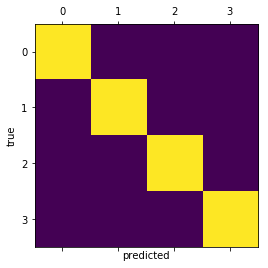

avg recall precision (1.0, 1.0)
avg classification rate 1.0


In [10]:
cm=ev.confusion_matrix(data[:,-1],train_pred,plot=True)
print('avg recall precision',ev.avg_recall_precision(cm))
print('avg classification rate',ev.avg_classification_rate(cm))

In [11]:
#testing a training set and test set using a 70:30 split
data2=data.copy()
#shuffle data
np.random.shuffle(data2)
split=0.7
train=data2[:int(len(data2)*split)]
test=data2[int(len(data2)*split):]

model=binarySearchTree(train)
print('Max depth is',model.get_max_depth())

Max depth is 12


In [12]:
#get prediction
y_pred=model.predict(test[:,:-1])

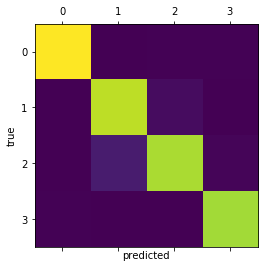

[[159, 0, 1, 1], [0, 143, 5, 0], [0, 12, 139, 2], [1, 0, 0, 137]]
avg recall precision (0.9637610527955797, 0.9637610527955797)
avg classification rate 0.9633333333333334


In [13]:
#evaluate
cm=ev.confusion_matrix(test[:,-1],y_pred,plot=True)
print(cm)
print('avg recall precision',ev.avg_recall_precision(cm))
print('avg classification rate',ev.avg_classification_rate(cm))